# Time-Series 

## Time-series (Sequece)
* https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
* 2009 - 2016년 사이 기후 데이터
* 기온, 기압, 강수량 등을 매 10분마다 기록

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from keras import models 
from keras import layers

zip_path = keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [4]:
import pandas as pd
df = pd.read_csv(csv_path)
time = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

In [5]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


/Users/bmin/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


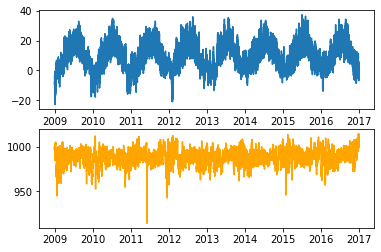

In [6]:
plt.subplot(211)
plt.plot(time,df['T (degC)'])
plt.subplot(212)
plt.plot(time,df['p (mbar)'],c='orange')

In [7]:
temp=df['T (degC)']

In [8]:
temp,time

(0        -8.02
 1        -8.41
 2        -8.51
 3        -8.31
 4        -8.27
           ... 
 420546   -4.05
 420547   -3.35
 420548   -3.16
 420549   -4.23
 420550   -4.82
 Name: T (degC), Length: 420551, dtype: float64, 0        2009-01-01 00:10:00
 1        2009-01-01 00:20:00
 2        2009-01-01 00:30:00
 3        2009-01-01 00:40:00
 4        2009-01-01 00:50:00
                  ...        
 420546   2016-12-31 23:20:00
 420547   2016-12-31 23:30:00
 420548   2016-12-31 23:40:00
 420549   2016-12-31 23:50:00
 420550   2017-01-01 00:00:00
 Name: Date Time, Length: 420551, dtype: datetime64[ns])

In [9]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


### 과거의 온도 데이터를 이용하여 내일의 기온을 예측하여라. 

#### Preprocessing

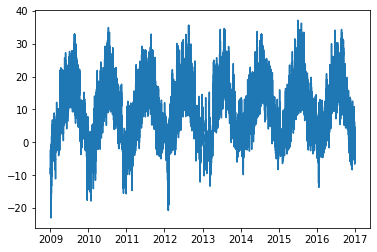

In [10]:
step = 6 # 1시간 마다
past = 240 # 10 일
tomo = 24 # 24 시간

temp=np.array(df['T (degC)'])
temp = temp[::step]
train_split=(int)(0.7*len(temp))

data = (temp[:train_split]-np.mean(temp[:train_split]))/np.std(temp[:train_split])
test = (temp[train_split:]-np.mean(temp[train_split:]))/np.std(temp[train_split:])

plt.plot(time[::step],temp)

* TimeseriesGenerator 
* https://keras.io/api/preprocessing/timeseries/  

In [11]:
def gent(ts, lookback):
    X, Y = [], []
    for i in range(len(ts) // lookback):
        X.append(ts[i*lookback:(i+1)*lookback])
        Y.append(ts[(i+1)*lookback])
    return np.array(X), np.array(Y)

In [12]:
x=np.arange(0,10,1)
gent(x,3)

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]), array([3, 6, 9]))

In [13]:
gen=gent(data,past)
x_test = gent(test,past)

In [14]:
len(gen[1])

204

### Naive Prediction

In [54]:
naive=np.array(test[tomo:][::tomo])
yy=np.array(test[:-tomo][::tomo])
np.mean(np.abs(yy-naive)), np.mean(np.abs(yy-naive))*np.std(temp)

(0.33087334613184316, 2.787211476989241)

## Linear Model

In [15]:
from tensorflow import keras
from keras import models 
from keras import layers

In [16]:
lin = models.Sequential()
lin.add(layers.Dense(1, activation='linear',input_shape=(240,)))
lin.compile(optimizer='nadam',loss='mse',metrics=['acc'])

In [17]:
lin.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 241       
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=lin.fit(gen[0],gen[1], epochs=100,verbose=0,validation_data=(x_test[0], x_test[1]))

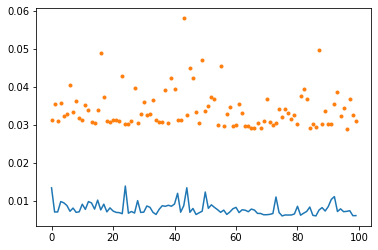

In [30]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'.')

(0, 200)

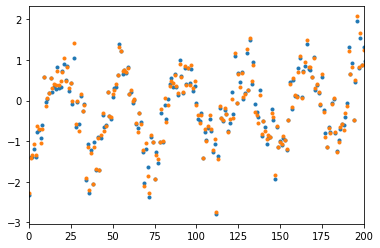

In [31]:
y1=lin.predict(gen[0]).flatten()
y2=gen[1]

plt.plot(y1,'.')
plt.plot(y2,'.')
plt.xlim(0,200)

In [32]:
np.corrcoef(y1,y2)

array([[1.        , 0.99641728],
       [0.99641728, 1.        ]])

In [33]:
x_test = gent(test,past)

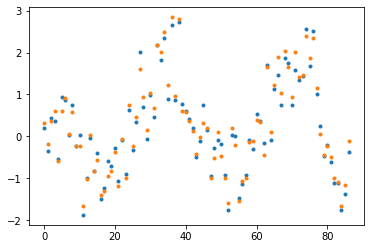

In [34]:
x1=lin.predict(x_test[0]).flatten()
x2=x_test[1]

plt.plot(x1,'.')
plt.plot(x2,'.')

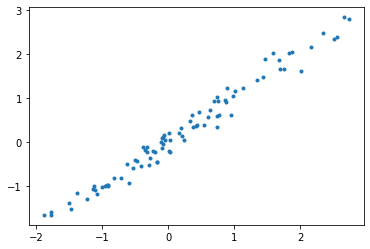

In [35]:
plt.plot(x1,x2,'.')

In [36]:
np.mean(np.abs(x1-x2)), np.mean(np.abs(x1-x2))*np.std(temp)

(0.1430810400604589, 1.205286317735487)

### Deep Learning 

In [37]:
net = models.Sequential()
net.add(layers.Dense(128, activation='linear',input_shape=(240,)))
net.add(layers.Dense(1, activation='linear'))
net.compile(optimizer='nadam',loss='mse',metrics=['acc'])

In [38]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               30848     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 30,977
Trainable params: 30,977
Non-trainable params: 0
_________________________________________________________________


In [41]:
history=net.fit(gen[0], gen[1], epochs=10,verbose=0,validation_data=(x_test[0], x_test[1]))

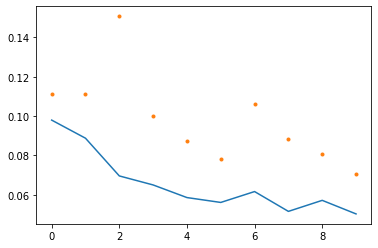

In [42]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'.')

In [47]:
y1=net.predict(x_test[0]).flatten()
y2=x_test[1]

np.corrcoef(y1,y2)

array([[1.        , 0.97144671],
       [0.97144671, 1.        ]])

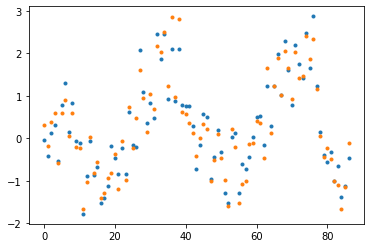

In [48]:
plt.plot(y1,'.')
plt.plot(y2,'.')

In [49]:
np.mean(np.abs(y1-x2)), np.mean(np.abs(y1-x2))*np.std(temp)

(0.21480267893309452, 1.8094551858274852)